# Visualizing Word Frequency In Julius Caesar
<p><img style="float: left ; margin: 5px 20px 5px 10px; width: 45%" src="https://www.gutenberg.org/files/1430/1430-h/images/ws.gif" > </p>
<p>What are the most frequent words in <a href='https://www.gutenberg.org/files/1522/1522-h/1522-h.htm'> Julius Caesar by Shakespeare
</a>, and how often do they occur? </p>
<p>In this notebook, we'll scrape the novel <em>Julius Caesar</em> from the website <a href="https://www.gutenberg.org/">Project Gutenberg</a> (which contains a large corpus of books) using the Python package <code>requests</code>. Then we'll extract words from this web data using <code>BeautifulSoup</code>. Next, we'll dive into analyzing the distribution of words using the Natural Language ToolKit (<code>nltk</code>) and <code>Counter</code>.Finally, we'll start data visualization technique where words from a given text are displayed in a chart, with the more important words being written with bigger, bold fonts, while less important words are displayed with smaller, thinner fonts. using <code>wordcloud</code>,<code>matplotlib.pylot</code> and <code>PIL</code></p>
<p>The <em>Data Science pipeline</em> we'll build in this notebook can be used to visualize the word frequency distributions of any novel that you can find on Project Gutenberg. The natural language processing tools used here apply to much of the data that data scientists encounter as a vast proportion of the world's data is unstructured data and includes a great deal of text. Text data has grown exponentially in recent years resulting in an ever-increasing need to analyze the massive amounts of such data. Word Cloud provides an excellent option to analyze the text data through visualization in the form of tags, or words, where the importance of a word is explained by its frequency.</p>
<p>Happy Coding!</p>

In [7]:
# Importing requests, BeautifulSoup, nltk, Counter. pandas, matplotlib.pyplot, wordcloud, regex, numpy, PIT

import requests
from bs4 import BeautifulSoup
import nltk
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re
import numpy as np
from PIL import Image

In [8]:
#getting the tempest book in html format

r_url = requests.get('https://www.gutenberg.org/files/1522/1522-h/1522-h.htm')
r_url.encoding = 'utf-8'
html = r_url.text
print(html[0:200])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
"http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >
<html xmlns="http://www.w3.org/1999/xhtml">



In [9]:
# Creating a BeautifulSoup object from the HTML
soup = BeautifulSoup(html,'html.parser')

# Getting the text out of the soup
text = soup.get_text().lower()

# Remove URL and number
text = re.sub("https*\S+", "", text)
text = re.sub(r'\S*\d+\S*', '', text)
bannedWord = ['project','ebook','gutenberg']
text= ' '.join(i for i in text.split() if i not in bannedWord)
text

'julius caesar, by william shakespeare gutenberg’s julius caesar, by william shakespeare this is for the use of anyone anywhere in the united states and most other parts of the world at no cost and with almost no restrictions whatsoever. you may copy it, give it away or re-use it under the terms of the license included with this or online at www.gutenberg.org. if you are not located in the united states, you’ll have to check the laws of the country where you are located before using this ebook. title: julius caesar author: william shakespeare release date: november [ebook last updated: february language: english character set encoding: *** start of this julius caesar *** this etext was produced by the pg shakespeare team, a team of about twenty volunteers. the tragedy of julius caesar by william shakespeare contents act i scene i. rome. a street. scene ii. the same. a public place. scene iii. the same. a street. act ii scene i. rome. brutus’ orchard. scene ii. a room in caesar’s palace

In [10]:
# Creating a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')

# Tokenizing the text
tokens = tokenizer.tokenize(text)

# Printing out the first 8 words / tokens 
tokens[0:120]

['julius',
 'caesar',
 'by',
 'william',
 'shakespeare',
 'gutenberg',
 's',
 'julius',
 'caesar',
 'by',
 'william',
 'shakespeare',
 'this',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'in',
 'the',
 'united',
 'states',
 'and',
 'most',
 'other',
 'parts',
 'of',
 'the',
 'world',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'license',
 'included',
 'with',
 'this',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'org',
 'if',
 'you',
 'are',
 'not',
 'located',
 'in',
 'the',
 'united',
 'states',
 'you',
 'll',
 'have',
 'to',
 'check',
 'the',
 'laws',
 'of',
 'the',
 'country',
 'where',
 'you',
 'are',
 'located',
 'before',
 'using',
 'this',
 'ebook',
 'title',
 'julius',
 'caesar',
 'author',
 'william',
 'shakespeare',
 'release',
 'date',
 'november',
 'ebook',
 'last',
 'updated',


In [17]:
# Getting the English stop words from nltk
sw = nltk.corpus.stopwords.words('english')
print(sw[0:100])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once']


In [23]:
# Create a list words_ns containing all words that are in words but not in sw
words_ns = [word for word in tokens if word not in sw]
print(words_ns[:100])


['julius', 'caesar', 'william', 'shakespeare', 'gutenberg', 'julius', 'caesar', 'william', 'shakespeare', 'use', 'anyone', 'anywhere', 'united', 'states', 'parts', 'world', 'cost', 'almost', 'restrictions', 'whatsoever', 'may', 'copy', 'give', 'away', 'use', 'terms', 'license', 'included', 'online', 'www', 'gutenberg', 'org', 'located', 'united', 'states', 'check', 'laws', 'country', 'located', 'using', 'ebook', 'title', 'julius', 'caesar', 'author', 'william', 'shakespeare', 'release', 'date', 'november', 'ebook', 'last', 'updated', 'february', 'language', 'english', 'character', 'set', 'encoding', 'start', 'julius', 'caesar', 'etext', 'produced', 'pg', 'shakespeare', 'team', 'team', 'twenty', 'volunteers', 'tragedy', 'julius', 'caesar', 'william', 'shakespeare', 'contents', 'act', 'scene', 'rome', 'street', 'scene', 'ii', 'public', 'place', 'scene', 'iii', 'street', 'act', 'ii', 'scene', 'rome', 'brutus', 'orchard', 'scene', 'ii', 'room', 'caesar', 'palace', 'scene', 'iii']


In [24]:
# Initialize a Counter object from our processed list of words
count = Counter(words_ns)
print(type(count))
print(max(count))
# Store 10 most common words and their counts as top_ten
top_ten = count.most_common(10)

# Print the top ten words and their counts
print(top_ten)

<class 'collections.Counter'>
ythee
[('brutus', 371), ('caesar', 286), ('cassius', 229), ('antony', 130), ('shall', 127), ('thou', 116), ('casca', 75), ('come', 75), ('gutenberg', 73), ('know', 71)]


In [25]:
#convert class 'collections.Counter' into dataframe
word_dataframe = pd.DataFrame.from_dict(count, orient='index').reset_index()

#rename Column
word_dataframe.columns = ['Word','Frequancy']

#sorting by most frequent word
word_dataframe.sort_values(by='Frequancy',ascending=False)


,Word,Frequancy
62,brutus,371
1,caesar,286
100,cassius,229
75,antony,130
380,shall,127
...,...,...
851,understood,1
1916,choice,1
1915,thousand,1
1914,fulfill,1


# visualizing frequency of words

A word cloud is a text visualization technique that focuses on the frequency of words and correlates the size and opacity of a word to its frequency within a body of text. The output is usually an image that depicts different words in different sizes and opacities relative to the word frequency.

An application of this form of visualization is document summarization, where you can process a body of text within a document and, based on the most prominent words, get a general summary of what the document is all about. This can also be applied in job applications where if the job description is analyzed, the largest words to appear are most likely the most important skills for the job.

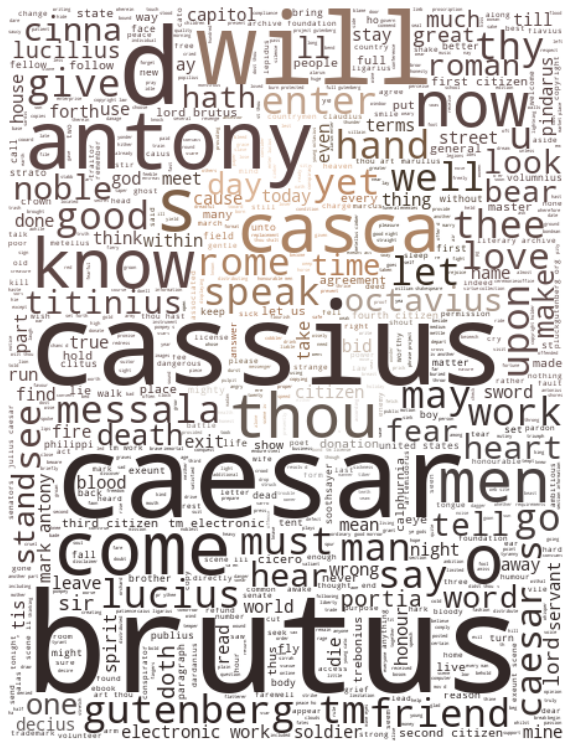

In [26]:
# visualizing frequency of words and correlates the size
stopwords = set(STOPWORDS)
mask = np.array(Image.open("WS.jpg"))
wordcloud_fra = WordCloud(stopwords=stopwords, background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(text)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[10,15])
plt.imshow(wordcloud_fra.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()